<a href="https://colab.research.google.com/github/tleedepriest/deep_learning_with_python/blob/main/multiclassification_on_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiclassification Model on IMDB Dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models
from keras import layers 

Define some functions we will use in the "main" function

In [4]:
def vec_sequences(sequences, dimension):
  """
  Parameters
  --------------
  sequences: 2d numpy arrary of ints
  
  dimension: int 
    the maximum length of each sequence.
    second dimension of results
  
  Returns
  --------------
  results: 2D numpy array
  
  Notes
  ---------------
  maps indexes found in sequences to
  vector of 1's and 0's
  """
  results = np.zeros(shape=(len(sequences), dimension))
  for i, seq in enumerate(sequences):
    results[i, seq] = 1
  return results

In [5]:
def plot_results(history, result='loss'):
  """
  Parameters
  -------------
  history: Object
    object obtain from model.fit function

  result: string
    'acc' or 'loss'
  
  Returns None
  """
  if result == 'loss':
    train_val = 'loss'
    val_val = 'val_loss'
    train_label = 'Training Loss'
    val_label = 'Validation Loss'
    title = 'Validation and Training Loss'
    y_label = 'Loss'
  else:
    train_val = 'acc'
    val_val = 'val_acc'
    train_label = 'Training Accuracy'
    val_label = 'Validation Accuracy'
    title = 'Validation and Training Accuracy'
    y_label = 'Accuracy'
  train_vals = history.history[train_val]
  val_vals = history.history[val_val]
  epochs = range(1, len(train_vals) +1)

  plt.plot(epochs, train_vals, 'bo', label=train_label)
  plt.plot(epochs, val_vals, 'b', label=val_label)
  plt.xlabel('epochs')
  plt.ylabel(y_label)
  plt.title(title)
  plt.legend()
  plt.show()

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[0])
print(train_labels[0])
print(len(train_data))
print(len(train_labels))
print(len(test_data))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
25000
25000
25000


Below we are using vec_sequences(although keras provides a built in utility function to do this)
to transform our input data into a 2D numpy array where each sequence in the arrary has the same length as the number of words in the dataset (10000)

For the labels, we use dimension as 46 because this is the number of labels, or types of news articles in the dataset.

In [7]:
X_train = vec_sequences(train_data, dimension=10000)
X_test = vec_sequences(test_data, dimension=10000)
y_train = vec_sequences(train_labels, dimension=46)
y_test = vec_sequences(test_labels, dimension=46)
print(y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

NOTE: We pick a softmax activation to end up with a probability distribution over the 46 topics.

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [24]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [25]:
history = model.fit(partial_X_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(X_val, y_val))

Epoch 1/20
47/47 [==============================] - 6s 85ms/step - loss: 0.9058 - acc: 0.7429 - val_loss: 0.3404 - val_acc: 0.8810
Epoch 2/20
47/47 [==============================] - 3s 64ms/step - loss: 0.3000 - acc: 0.8882 - val_loss: 0.2727 - val_acc: 0.8840
Epoch 3/20
47/47 [==============================] - 3s 63ms/step - loss: 0.2202 - acc: 0.9162 - val_loss: 0.3129 - val_acc: 0.8710
Epoch 4/20
47/47 [==============================] - 3s 63ms/step - loss: 0.1794 - acc: 0.9310 - val_loss: 0.2639 - val_acc: 0.8850
Epoch 5/20
47/47 [==============================] - 3s 62ms/step - loss: 0.1467 - acc: 0.9448 - val_loss: 0.2832 - val_acc: 0.8940
Epoch 6/20
47/47 [==============================] - 3s 63ms/step - loss: 0.1163 - acc: 0.9577 - val_loss: 0.2929 - val_acc: 0.8860
Epoch 7/20
47/47 [==============================] - 3s 63ms/step - loss: 0.0903 - acc: 0.9690 - val_loss: 0.3974 - val_acc: 0.8660
Epoch 8/20
47/47 [==============================] - 3s 62ms/step - loss: 0.0694 - a

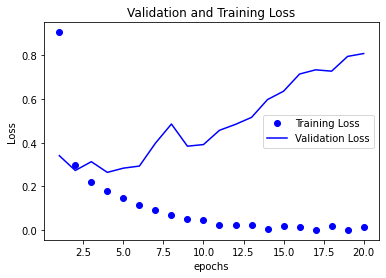

In [31]:
plot_results(history=history)

The chart above shows that the loss decreases for the validation data, but increases for the training data. This is the phenemena of overfitting where the model begins to learn features specific to the training data.

We should stop the number of epochs aroudn 3 or 4
before training loss begins to increase.

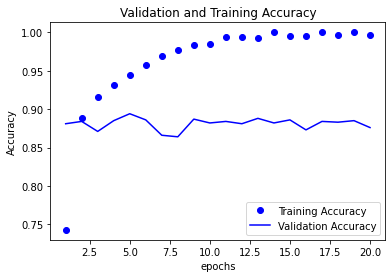

In [40]:
plot_results(history, result='acc')

In [10]:
model.fit(X_train, 
          y_train,
          epochs=4,
          batch_size=512)


Epoch 1/4
49/49 [==============================] - 4s 48ms/step - loss: 0.7876 - acc: 0.7608
Epoch 2/4
49/49 [==============================] - 2s 46ms/step - loss: 0.2901 - acc: 0.8889
Epoch 3/4
49/49 [==============================] - 2s 47ms/step - loss: 0.2160 - acc: 0.9178
Epoch 4/4
49/49 [==============================] - 2s 45ms/step - loss: 0.1774 - acc: 0.9328


In [11]:
results = model.evaluate(X_test, y_test)
print(results)

782/782 [==============================] - 2s 3ms/step - loss: 0.3035 - acc: 0.8809
[0.30353042483329773, 0.8809199929237366]


In [12]:
predictions = model.predict(X_test)

In [17]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(predictions[0][0]*100)
print(predictions[0].shape)
print(np.sum(predictions[0]))

[7.7179742e-01 2.2726390e-01 1.0218098e-05 8.9179389e-07 2.4392011e-05
 2.8028671e-05 8.6272448e-06 1.9345400e-05 8.7875414e-06 8.9131063e-06
 1.6712409e-05 4.3081855e-06 2.2125043e-05 9.0057347e-06 4.2142845e-05
 5.6227738e-05 5.6644071e-06 2.6112029e-06 6.5411325e-05 6.1362839e-06
 2.0558222e-05 5.3277586e-06 3.3521177e-05 1.0429603e-05 1.9111560e-05
 9.1247439e-06 1.0248083e-04 3.7961072e-05 1.6452395e-05 3.5340312e-05
 1.2075129e-05 2.0454972e-06 1.4401283e-05 3.0536896e-05 4.2222131e-05
 2.6070340e-05 7.2493560e-05 1.7946391e-05 8.5830698e-06 3.5792698e-06
 2.4389894e-05 9.3919307e-06 6.2684267e-06 1.1797557e-05 2.3631970e-05
 3.3436104e-06]
0
77.17974185943604
(46,)
0.9999999


Note, Instead of one-hot encoding the training and test labels as 46 len vectors, we could have used this approach below, which casts the labels to an numpy array

In [19]:
y_train = np.asarray(train_labels)
y_test = np.asarray(test_labels)
print(y_train[0])
print(y_train.shape)


1
(25000,)


If we choose the approach above, we need to change the loss function in our model to 'sparse_categorical_crossentropy'